# 線性回歸

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/logo.png" width=150>

在本堂課中，我們會學習線性回歸方法。首先，我們會先了解其背後基本的數學原理，並且用 Python 實現它。接著我們會來看看幾種運用線性模型的方法。



# 總覽

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/linear.png" width=250>

$\hat{y} = XW$

*其中*:
* $\hat{y}$ = 預測值 | $\in \mathbb{R}^{NX1}$ ($N$ 指樣本數量)
* $X$ = 輸入值 | $\in \mathbb{R}^{NXD}$ ($D$ 指特徵數量)
* $W$ = 權重 | $\in \mathbb{R}^{DX1}$ 

* **目標:**  透過線性模型使用輸入 $X$ 來預測輸出值 $\hat{y}$。該模型會找到一條最佳擬合線，用來最小化預測值和實際值之間的距離。訓練資料 $(X, y)$ 會透過隨機梯度下降演算法 (SGD) 來訓練模型和學習權重 $W$。
* **優點:**
  * 運算容易
  * 具有高度可解釋性
  * 可以應用在連續或類別型特徵
* **缺點:**
  * 該模型只會在資料是線性可分的情況下才會表現較佳
  * 通常不會用在分類，而僅用在迴歸問題上
* **其他:** 你也可以在二元分類問題上使用線性迴歸，當預測的值超過某個閥值時，就預測該樣本為為某一類別。但我們在後面的課程中會看到更好的分類方法，而這裡我們單純使用線性迴歸的方法來預測連續數值的任務上


# 訓練

*步驟*: 
1. 隨機初始化模型的權重 $W$.
2. 將 $X$ 輸入到模型中來得到預測值 $\hat{y}$.
3. 透過目標 (損失) 函式 $J$ 比較預測值 $\hat{y}$ 和實際值 $y$ 來決定之間的差距。線性迴歸常用的目標函式是均方誤差 (MSE)。這個函式會計算預測值和實際值之間的差值並進行平方 (要注意的是 $\frac{1}{2}$ 僅用來簡化計算導數時使用)
  * $MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2$
4. 計算基於模型權重的損失 $J(\theta)$ 的梯度值：
  * $J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 $
  * $\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)$
4. 透過學習率 $\alpha$ 和一種最佳化技術(例如：隨機梯度下降法)，透過反向傳播方法來更新權重 $W$。這背後簡單的直覺是，梯度會告訴你在哪個方向增加某些東西，所以透過減去梯度來降低損失 $J(\theta)$：
  * $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
5. 重複步驟 2 ~ 5 直到模型表現良好

# Data

We're going to create some simple dummy data to apply linear regression on.

In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Arguments
args = Namespace(
    seed=1234,
    data_file="sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# Set seed for reproducability
np.random.seed(args.seed)

In [8]:
# Generate synthetic data
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,10,size=num_samples)
    y = 3.65*X + 10 + random_noise # add some noise
    return X, y

In [16]:
# Generate random (linear) data
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,8.022128
1,1.0,22.262288
2,2.0,17.606723
3,3.0,27.141640
4,4.0,32.235445


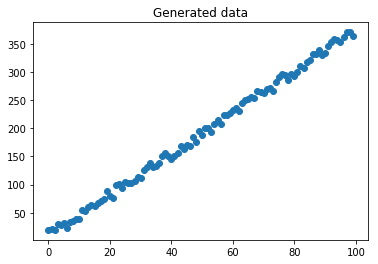

In [7]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# Scikit-learn implementation

**Note**: The `LinearRegression` class in Scikit-learn uses the normal equation to solve the fit. However, we are going to use Scikit-learn's `SGDRegressor` class which uses stochastic gradient descent. We want to use this optimization approach because we will be using this for the models in subsequent lessons.

In [6]:
# Import packages
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Create data splits
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=args.test_size, 
    random_state=args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


We need to standardize our data (zero mean and unit variance) in order to properly use SGD and optimize quickly.

In [8]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# Check
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

mean: [8.22952817e-17] 7.350601608872391e-17
std: [1.] 1.0


In [9]:
# Initialize the model
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [10]:
# Train
lm.fit(X=standardized_X_train, y=standardized_y_train)

/Users/mtk11018/anaconda/envs/torch/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

# Evaluation

There are several evaluation techniques to see how well our model performed.

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 29.14, test_MSE: 35.00


Besides MSE, when we only have one feature, we can visually inspect the model.

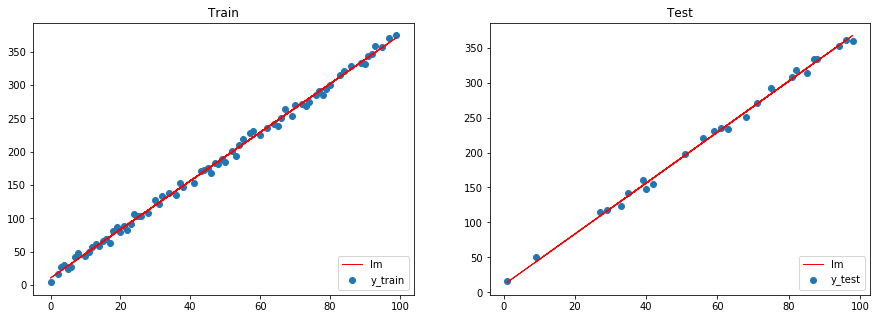

In [14]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Show plots
plt.show()

# Inference

In [15]:
# Feed in your own inputs
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[10.50158072 14.14515288 17.78872504]


,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555


# Interpretability

Linear regression offers the great advantage of being highly interpretable. Each feature has a coefficient which signifies it's importance/impact on the output variable y. We can interpret our coefficient as follows: by increasing X by 1 unit, we increase y by $W$ (~3.65) units. 

**Note**: Since we standardized our inputs and outputs for gradient descent, we need to apply an operation to our coefficients and intercept to interpret them. See proof below.

In [16]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.64357519]
[10.50158285]


### Proof for unstandardizing coefficients:



Note that both X and y were standardized.

$\frac{\hat{y} - \mathbb{E}[y]}{\sigma_y} = W_0 + \sum_{j=1}^{k}W_jz_j$

$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = \hat{W}_0\sigma_y + \bar{y} - \sum_{j=1}^{k} \hat{W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}\hat{W}_j(\frac{\sigma_y}{\sigma_j})x_j $


# Regularization

Regularization helps decrease overfitting. Below is L2 regularization (ridge regression). There are many forms of regularization but they all work to reduce overfitting in our models. With L2 regularization, we are penalizing the weights with large magnitudes by decaying them. Having certain weights with high magnitudes will lead to preferential bias with the inputs and we want the model to work with all the inputs and not just a select few. There are also other types of regularization like L1 (lasso regression) which is useful for creating sparse models where some feature cofficients are zeroed out, or elastic which combines L1 and L2 penalties. 

**Note**: Regularization is not just for linear regression. You can use it to regularize any model's weights including the ones we will look at in future lessons.

* $ J(\theta) = = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 + \frac{\lambda}{2}W^TW$
* $ \frac{\partial{J}}{\partial{W}}  = X (\hat{y} - y) + \lambda W $
* $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
where:
  * $\lambda$ is the regularzation coefficient

In [17]:
# Initialize the model with L2 regularization
lm = SGDRegressor(loss="squared_loss", penalty='l2', alpha=1e-2, 
                  max_iter=args.num_epochs)

In [18]:
# Train
lm.fit(X=standardized_X_train, y=standardized_y_train)

/Users/mtk11018/anaconda/envs/torch/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [20]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 30.22, test_MSE: 35.73


Regularization didn't help much with this specific example because our data is generated from a perfect linear equation but for realistic data, regularization can help our model generalize well.

In [21]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.60760035]
[12.17506412]


# Categorical variables

In our example, the feature was a continuous variable but what if we also have features that are categorical? One option is to treat the categorical variables as one-hot encoded variables. This is very easy to do with Pandas and once you create the dummy variables, you can use the same steps as above to train your linear model.

In [22]:
# Create data with categorical features
cat_data = pd.DataFrame(['a', 'b', 'c', 'a'], columns=['favorite_letter'])
cat_data.head()

,favorite_letter
0,a
1,b
2,c
3,a


In [23]:
dummy_cat_data = pd.get_dummies(cat_data)
dummy_cat_data.head()

,favorite_letter_a,favorite_letter_b,favorite_letter_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Now you can concat this with your continuous features and train the linear model.

# TODO

- polynomial regression
- simple example with normal equation method (sklearn.linear_model.LinearRegression) with pros and cons vs. SGD linear regression